In [1]:
from tensorflow import keras
import tensorflow as tf
from keras.utils import to_categorical
import numpy as np
import os
import pickle as pkl

train_dict = pkl.load(open("../input/comp4901k/train.pkl", "rb"))
val_dict = pkl.load(open("../input/comp4901k/val.pkl", "rb"))
test_dict = pkl.load(open("../input/comp4901k/test.pkl", "rb"))

print("keys in train_dict:", train_dict.keys())
print("keys in val_dict:", val_dict.keys())
print("keys in test_dict:", test_dict.keys())

keys in train_dict: dict_keys(['id', 'word_seq', 'tag_seq'])
keys in val_dict: dict_keys(['id', 'word_seq', 'tag_seq'])
keys in test_dict: dict_keys(['id', 'word_seq'])


In [2]:
# prepare word vocab and tag vocab

vocab_freq_dict = {}
tag_freq_dict = {}

for i in range(len(train_dict['word_seq'])):
    for j in range(len(train_dict['word_seq'][i])):
        word = train_dict['word_seq'][i][j]
        tag = train_dict['tag_seq'][i][j]
        if word in vocab_freq_dict:
            if tag in vocab_freq_dict[word]:
                vocab_freq_dict[word][tag] += 1
            else:
                vocab_freq_dict[word][tag] = 1
        else:
            vocab_freq_dict[word] = {}
            vocab_freq_dict[word][tag] = 1
        if tag in tag_freq_dict:
            tag_freq_dict[tag] += 1
        else:
            tag_freq_dict[tag] = 1

In [3]:
tag_freq_dict.pop('_t_pad_')

229579

In [4]:
tag_freq_dict = dict(sorted(tag_freq_dict.items(), key=lambda tag_freq_dict: tag_freq_dict[1], reverse=True))

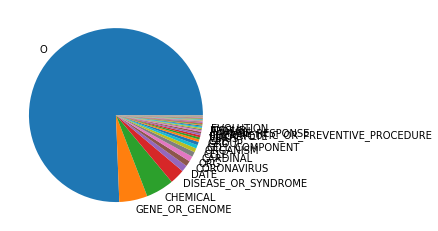

In [5]:
from matplotlib import pyplot
labels = list(tag_freq_dict.keys())[:20] + ['']*(len(tag_freq_dict)-20)
pyplot.pie(tag_freq_dict.values(), labels=labels)
pyplot.show()

In [6]:
# a Naive statistics model
vocab_max_dict = {}
for (vocab, freq_dict) in vocab_freq_dict.items():
    vocab_max_dict[vocab] = max(freq_dict, key=freq_dict.get)
    
train_result = np.vectorize(lambda word: vocab_max_dict.get(word, 'O'))(train_dict['word_seq'])
val_result = np.vectorize(lambda word: vocab_max_dict.get(word, 'O'))(val_dict['word_seq'])

In [7]:
vocab_freq_dict['antigen']

{'O': 53,
 'CHEMICAL': 405,
 'GENE_OR_GENOME': 425,
 'LABORATORY_PROCEDURE': 5,
 'DISEASE_OR_SYNDROME': 4,
 'WORK_OF_ART': 1,
 'ORG': 1,
 'CELL': 3}

In [8]:

def calc_accuracy(preds, tags, padding_id="_t_pad_"):
    """
        Input:
            preds (np.narray): (num_data, length_sentence)
            tags  (np.narray): (num_data, length_sentence)
        Output:
            Proportion of correct prediction. The padding tokens are filtered out.
    """
    preds_flatten = preds.flatten()
    tags_flatten = tags.flatten()
    non_padding_idx = np.where(tags_flatten!=padding_id)[0]
    
    return sum(preds_flatten[non_padding_idx]==tags_flatten[non_padding_idx])/len(non_padding_idx)

In [9]:
calc_accuracy(train_result, np.array(train_dict['tag_seq']))

0.8686811255719271

In [10]:
calc_accuracy(val_result, np.array(val_dict['tag_seq']))

0.8548786485001012